In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving building_original.tif to building_original (1).tif


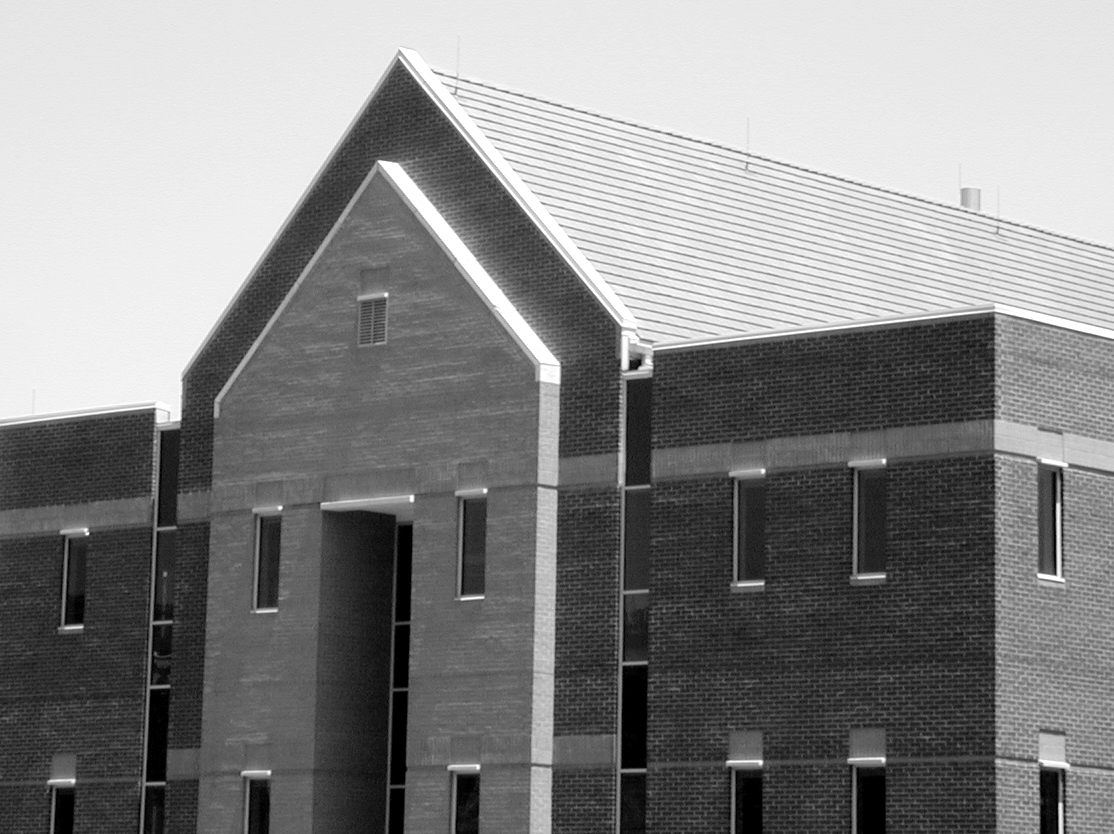

In [3]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('building_original.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [49]:
# Step2. OpenCV의 GaussianBlur 함수를 이용해 원래 이미지에 blur 처리를 하세요. 

gaussian_blur_I = cv2.GaussianBlur(I,(5,5),5)

In [50]:
# Step3. Step2의 결과를 0~1까지 float 형으로 normalization하세요. (OpenCV의 normalize함수 사용)

I_norm = cv2.normalize(gaussian_blur_I, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [51]:
# Step4. Sobel kernel의 x와 y mask를 이용하여 Step3의 결과에 대한 x방향과 y방향 gradient image를 각각 만드세요.

def sobel_filter_x(image):
    
    kernel = np.array([[-1,0,1],
                       [-2,0,2],
                       [-1,0,1]]) 
    border = cv2.filter2D(image,-1, kernel)
        
    return border

def sobel_filter_y(image):
    
    kernel = np.array([[-1,-2,-1],
                       [0,0,0],
                       [1,2,1]]) 
    border = cv2.filter2D(image,-1, kernel)
        
    return border



my_I_norm_sobel_x = sobel_filter_x(I_norm)
my_I_norm_sobel_y = sobel_filter_y(I_norm)

# cv2_imshow(np.clip(my_I_norm_sobel_x*255 , 0, 255))
# cv2_imshow(np.clip(my_I_norm_sobel_y*255 , 0, 255))

In [52]:
# Step5. Step4에서 구한 2개의 결과를 각각 절대값으로 만든 후 더하세요.

my_I_norm_sobel = np.abs(I_norm_sobel_x) + np.abs(I_norm_sobel_y)

# cv2_imshow(np.clip(my_I_norm_sobel*255 , 0, 255))

In [53]:
# Step6. 본인이 Threshold를 지정해 Step5의 결과에서 Threshold를 넘으면 255, 안 넘으면 0이 되는 matrix를 만드세요.

Threshold = 0.3

my_I_sobel_threshold = I_norm_sobel > Threshold
my_I_sobel_threshold = my_I_sobel_threshold * 255
my_I_sobel_threshold = my_I_sobel_threshold.astype('uint8')

# cv2_imshow(my_I_sobel_threshold)

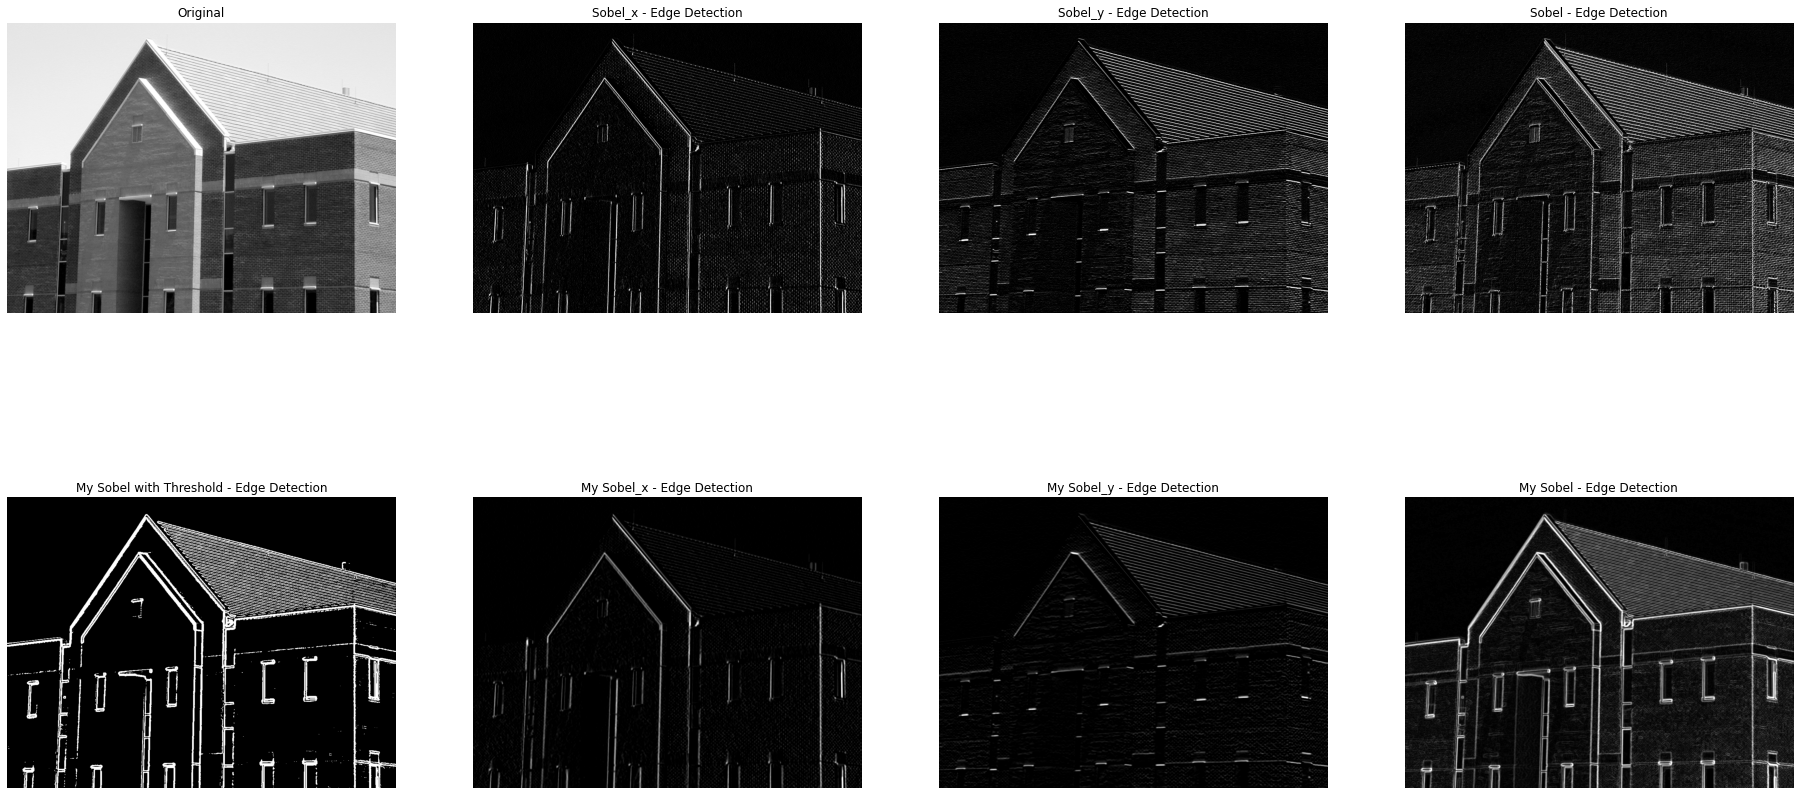

In [54]:
# Step2의 결과, Step4의 결과, Step5, Step6의 결과를 각각 보여주세요.

fig = plt.figure(figsize = (32, 16)) 
rows = 2
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
I_sobel_x = cv2.Sobel(I, cv2.CV_8U, 1, 0, 3)
I_sobel_x_RGB = cv2.cvtColor(I_sobel_x, cv2.COLOR_GRAY2RGB)
ax2.imshow(I_sobel_x_RGB)
ax2.set_title('Sobel_x - Edge Detection')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
I_sobel_y = cv2.Sobel(I, cv2.CV_8U, 0, 1, 3)
I_sobel_y_RGB = cv2.cvtColor(I_sobel_y, cv2.COLOR_GRAY2RGB)
ax3.imshow(I_sobel_y_RGB)
ax3.set_title('Sobel_y - Edge Detection')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
I_sobel_RGB = cv2.cvtColor(I_sobel_x + I_sobel_y, cv2.COLOR_GRAY2RGB)
ax4.imshow(I_sobel_RGB)
ax4.set_title('Sobel - Edge Detection')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
my_I_sobel_threshold_RGB = cv2.cvtColor(my_I_sobel_threshold, cv2.COLOR_GRAY2RGB)
ax5.imshow(my_I_sobel_threshold_RGB)
ax5.set_title('My Sobel with Threshold - Edge Detection')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
my_I_sobel_x_RGB = cv2.cvtColor(np.clip(my_I_norm_sobel_x*255 , 0 , 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
ax6.imshow(my_I_sobel_x_RGB)
ax6.set_title('My Sobel_x - Edge Detection')
ax6.axis("off")

ax7 = fig.add_subplot(rows, cols, 7)
my_I_sobel_y_RGB = cv2.cvtColor(np.clip(my_I_norm_sobel_y*255 , 0 , 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
ax7.imshow(my_I_sobel_y_RGB)
ax7.set_title('My Sobel_y - Edge Detection')
ax7.axis("off")

ax8 = fig.add_subplot(rows, cols, 8)
my_I_sobel_RGB = cv2.cvtColor(np.clip(my_I_norm_sobel*255 , 0 , 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
ax8.imshow(my_I_sobel_RGB)
ax8.set_title('My Sobel - Edge Detection')
ax8.axis("off")


plt.show()
